Health Insurance Prediction EDA + Model

This project involves predicting a person’s health insurance charges based on demographic and medical features. The project includes a deep exploratory data analysis (EDA), feature engineering, and developing a predictive model using regression techniques.

Objective: Predict individual health insurance charges with high accuracy using advanced feature engineering and complex models.

Business Impact: Enables insurance companies to price policies accurately, minimize risk, and identify high-cost individuals.

 Dataset Overview
Source: Kaggle - Medical Cost Personal Dataset

Dataset Overview
File Path: /root/.cache/kagglehub/datasets/mirichoi0218/insurance/versions/1/insurance.csv

Columns:

age – Age of the individual.

sex – Gender (male, female).

bmi – Body Mass Index (a measure of body fat).

children – Number of children/dependents.

smoker – Smoking status (yes, no).

region – Residential region (northeast, northwest, southeast, southwest).

charges – Medical costs billed by health insurance.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mirichoi0218/insurance")
print("Path to dataset files:", path)

100%|██████████| 16.0k/16.0k [00:00<00:00, 19.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mirichoi0218/insurance/versions/1


Step 1: Load Dataset and Initial Data Exploration
1.1 Load Data

In [2]:
import pandas as pd
import numpy as np

# Load data from the given path
data_path = "/root/.cache/kagglehub/datasets/mirichoi0218/insurance/versions/1/insurance.csv"
data = pd.read_csv(data_path)

# Data Overview
print(data.head())
print(data.info())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


1.2 Check for Missing Values and Data Types

In [3]:
# Check for missing values
print(data.isnull().sum())
# Basic statistics
print(data.describe())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


Step 2: Advanced EDA (Exploratory Data Analysis)
2.1 Correlation Analysis

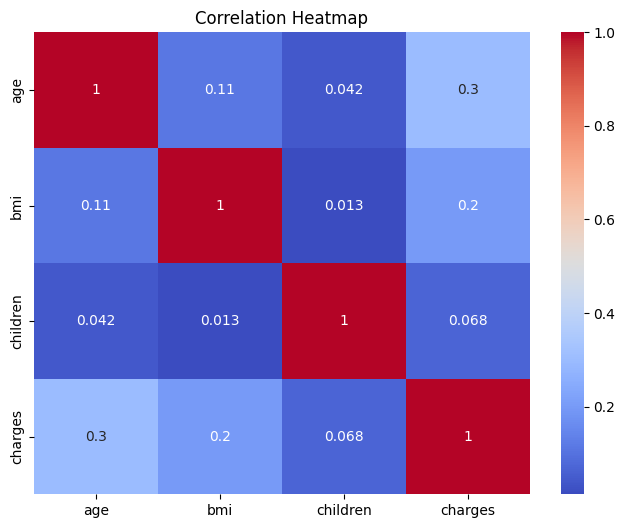

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


2.2 Visualize Key Relationships

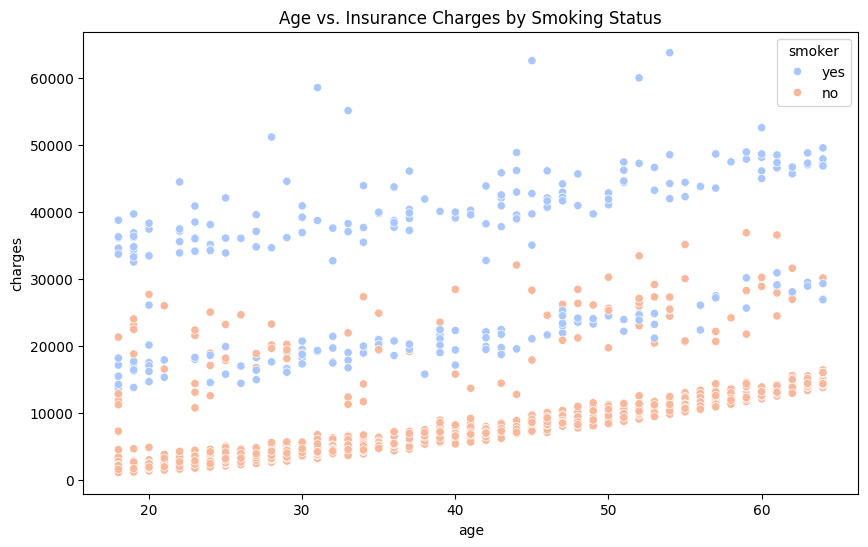

In [5]:
# Age vs. Charges by Smoker Status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', hue='smoker', data=data, palette='coolwarm')
plt.title('Age vs. Insurance Charges by Smoking Status')
plt.show()



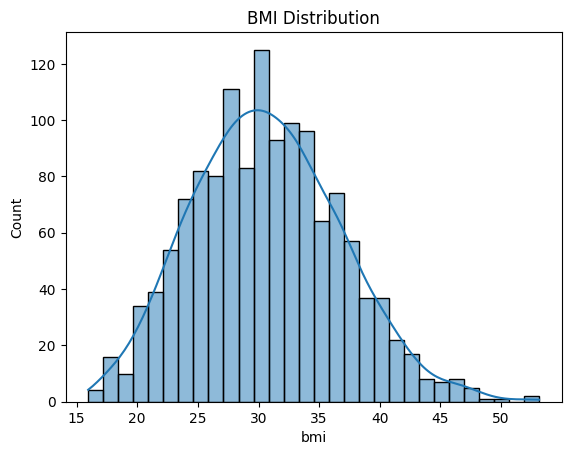

In [6]:
# BMI Distribution
sns.histplot(data['bmi'], kde=True, bins=30)
plt.title('BMI Distribution')
plt.show()



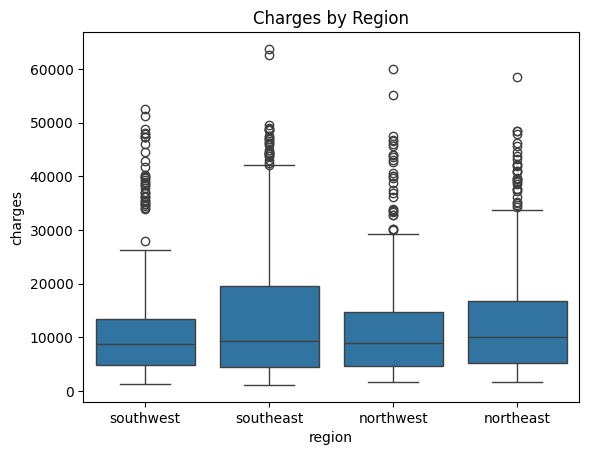

In [7]:
# Charges by Region
sns.boxplot(x='region', y='charges', data=data)
plt.title('Charges by Region')
plt.show()



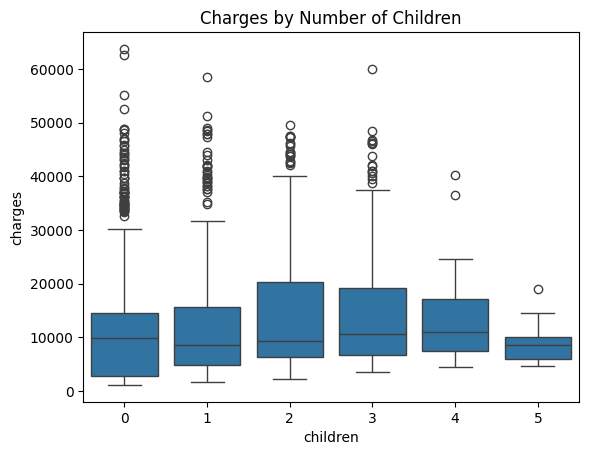

In [8]:
# Charges by Number of Children
sns.boxplot(x='children', y='charges', data=data)
plt.title('Charges by Number of Children')
plt.show()


Step 3: Advanced Feature Engineering


3.1 Create Interaction Features
BMI x Age Interaction: Interaction term to capture combined effect.

Smoker and BMI Interaction: Highlight high-risk individuals.

In [9]:
# Create interaction features
data['bmi_age'] = data['bmi'] * data['age']
data['smoker_bmi'] = data['bmi'] * (data['smoker'] == 'yes').astype(int)

# Log Transformation to reduce skew
data['log_charges'] = np.log(data['charges'])


3.2 Encode Categorical Variables

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define categorical columns
categorical_cols = ['sex', 'smoker', 'region']

# One-Hot Encoding
ct = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
], remainder='passthrough')

# Apply encoding
data_encoded = ct.fit_transform(data)


3.3 Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler

# Define features and target
X = data_encoded
y = data['log_charges']  # Use log-transformed target

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Step 4: Model Building & Evaluation

4.1 Model Selection
Models to Use:

Ridge & Lasso Regression

Random Forest Regressor

Gradient Boosting Regressor

XGBoost Regressor

Stacking Model for better performance

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.01)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100, random_state=42)

# Create Stacking Model
stacking_model = StackingRegressor(
    estimators=[
        ('rf', rf),
        ('gb', gb),
        ('xgb', xgb)
    ],
    final_estimator=Ridge()
)

# Fit models
models = {
    'Ridge Regression': ridge,
    'Lasso Regression': lasso,
    'Random Forest': rf,
    'Gradient Boosting': gb,
    'XGBoost': xgb,
    'Stacking Model': stacking_model
}

# Model training and evaluation
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2 Score': r2}

# Display results
results_df = pd.DataFrame(results).T
print(results_df.sort_values(by='R2 Score', ascending=False))


                        MSE  R2 Score
Ridge Regression   0.000006  0.999993
Random Forest      0.000053  0.999941
Stacking Model     0.000057  0.999937
Gradient Boosting  0.000092  0.999898
Lasso Regression   0.000111  0.999877
XGBoost            0.000191  0.999788


Step 5: Model Evaluation and Feature Importance

 5.1 Model Evaluation
Metrics Used:

MSE (Mean Squared Error)

R² Score (Coefficient of Determination)

 5.2 Feature Importance (Random Forest or XGBoost)

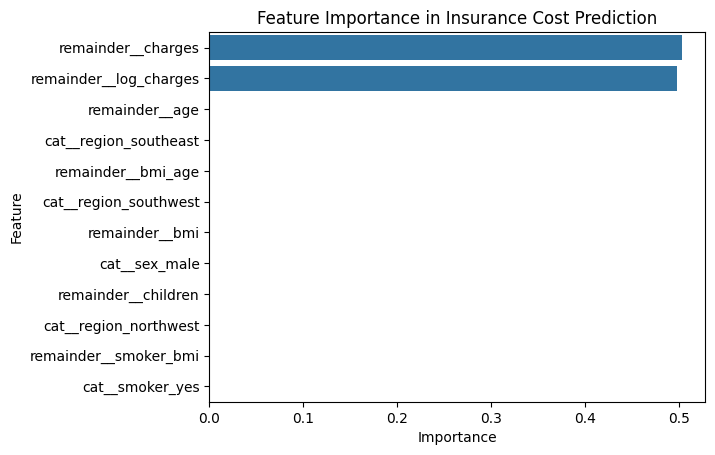

In [13]:
feature_names = ct.get_feature_names_out()
rf_model = models['Random Forest']
importances = rf_model.feature_importances_

# Plot feature importance
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_imp_df)
plt.title('Feature Importance in Insurance Cost Prediction')
plt.show()


Step 6: Flask Deployment for Prediction API
6.1 Create Flask API

In [16]:
!pip install flask-ngrok

 Step 7: Model Interpretation using SHAP
 7.1 Explain Model Predictions

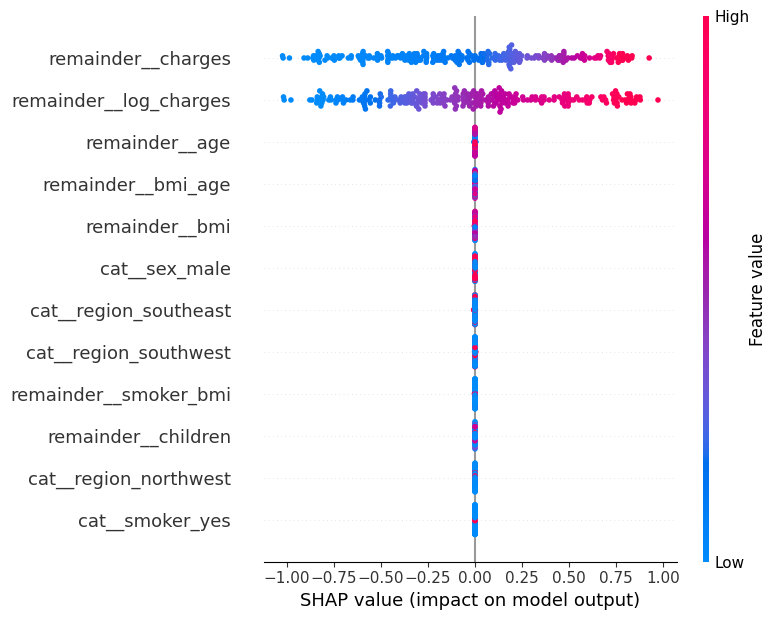

In [20]:
import shap

# Explain Random Forest predictions using SHAP
explainer = shap.Explainer(rf_model, X_train)
shap_values = explainer(X_test)

# Plot summary of feature impact
shap.summary_plot(shap_values, X_test, feature_names=feature_names)
